In [ ]:
import os
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from os import listdir
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import tensorflow as tf
import missingno as msno
import math
%matplotlib inline


df = pd.read_csv('/content/drive/My Drive/Mini Project-Sepsis/cleaned.csv')
temp = df
df = df.iloc[:, 2:]
df.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,Glucose,Gender,ICULOS,SepsisLabel
0,106.0,100.0,36.78,126.0,69.0,50.5,32.0,18.0,65.0,0,1,0
1,85.0,100.0,36.10,117.0,90.0,74.0,11.0,38.5,305.0,0,2,0
2,89.5,100.0,36.55,122.5,93.0,75.5,9.5,31.0,106.0,0,3,0
3,97.0,99.0,36.70,127.0,97.0,79.0,12.0,26.0,242.0,0,4,0
4,90.0,98.0,37.00,110.0,85.0,70.0,14.0,25.0,212.0,0,5,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = df.astype({"Gender" : 'category', "SepsisLabel" : 'category'})
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56110 entries, 0 to 56109
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   HR           56110 non-null  float64 
 1   O2Sat        56110 non-null  float64 
 2   Temp         56110 non-null  float64 
 3   SBP          56110 non-null  float64 
 4   MAP          56110 non-null  float64 
 5   DBP          56110 non-null  float64 
 6   Resp         56110 non-null  float64 
 7   EtCO2        56110 non-null  float64 
 8   Glucose      56110 non-null  float64 
 9   Gender       56110 non-null  category
 10  ICULOS       56110 non-null  float64 
 11  SepsisLabel  56110 non-null  category
dtypes: category(2), float64(10)
memory usage: 4.4 MB
None


In [ ]:
for i in range(df.shape[1]) :
    if i == 9 or i == 11 :
        continue 
    else:
        df.iloc[:, i] = (df.iloc[:, i] - min(df.iloc[:, i])) / (max(df.iloc[:, i]) - min(df.iloc[:, i]))
df.head(31)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,Glucose,Gender,ICULOS,SepsisLabel
0,0.5300,1.00,0.908148,0.450000,0.231544,0.175958,0.336842,0.272727,0.088677,0,0.025,0
1,0.4250,1.00,0.891358,0.417857,0.302013,0.257840,0.115789,0.583333,0.416098,0,0.050,0
2,0.4475,1.00,0.902469,0.437500,0.312081,0.263066,0.100000,0.469697,0.144611,0,0.075,0
3,0.4850,0.99,0.906173,0.453571,0.325503,0.275261,0.126316,0.393939,0.330150,0,0.100,0
4,0.4500,0.98,0.913580,0.392857,0.285235,0.243902,0.147368,0.378788,0.289222,0,0.125,0
5,0.4300,0.97,0.916049,0.382143,0.278523,0.240418,0.105263,0.636364,0.233288,0,0.150,1
6,0.4350,0.93,0.918519,0.400000,0.268456,0.236934,0.147368,0.530303,0.230559,0,0.175,1
7,0.4400,0.98,0.913580,0.425000,0.299765,0.250871,0.052632,0.575758,0.166439,0,0.200,1
8,0.4350,1.00,0.913580,0.446429,0.308725,0.254355,0.142105,0.462121,0.129604,0,0.225,1
9,0.4300,0.99,0.911111,0.425000,0.302013,0.250871,0.042105,0.681818,0.334243,0,0.250,1


In [ ]:
df1 = df
y = []
ct = 0; t1 = 0; t2 = 0
while(ct <= 56109):
    if ct > 60000:
        print("Sorry\n")
        break
    f = 0;
    for j in range(ct, ct+31, 1):
        if df1.iloc[j, -1] == 1:
            f = 1
            break
        # print(j, end = ' ')
    # print("\n")
    if f == 1:
        y.append(1)
        t1 += 1
    else:
        y.append(0)
        t2 += 1
    ct += 31
X = np.array(df1.iloc[:, 0:11].to_numpy().reshape(1810, 31, 11))
y = np.array(y).reshape(1810)

X_train = np.array(df1.iloc[0:42098, 0:11])
X_test = np.array(df1.iloc[42098:, 0:11])
y_train = y[0:1358]
y_test = y[1358:1810]

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

X_train = X_train.reshape(1358, 31, 11)
X_test = X_test.reshape(452, 31, 11)
y_train = y_train.reshape(1358) 
y_test = y_test.reshape(452)


In [ ]:
print(t1, " ", t2)

1308   502


In [ ]:
def create_model():
  model = tf.keras.Sequential([
      tf.keras.layers.LSTM(32, input_shape = (31, 11), return_sequences=True),
      tf.keras.layers.Dropout(rate = 0.2),
      tf.keras.layers.LSTM(32),
      tf.keras.layers.Dropout(rate = 0.2),
    # tf.keras.layers.Dense(16,activation='relu'),
      tf.keras.layers.Dense(16,activation='relu'),
      tf.keras.layers.Dropout(rate = 0.2),
      tf.keras.layers.Dense(4,activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
     ])
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 31, 32)            5632      
_________________________________________________________________
dropout_6 (Dropout)          (None, 31, 32)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_8 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 4)                

In [ ]:

history = model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=1, validation_split=0.2, shuffle=False )

Epoch 1/500
34/34 [==============================] - 2s 55ms/step - loss: 0.5955 - accuracy: 0.7698 - val_loss: 0.7449 - val_accuracy: 0.6213
Epoch 2/500
34/34 [==============================] - 1s 29ms/step - loss: 0.4820 - accuracy: 0.7891 - val_loss: 0.5753 - val_accuracy: 0.6213
Epoch 3/500
34/34 [==============================] - 1s 33ms/step - loss: 0.4325 - accuracy: 0.7919 - val_loss: 0.5796 - val_accuracy: 0.6213
Epoch 4/500
34/34 [==============================] - 1s 32ms/step - loss: 0.4020 - accuracy: 0.7901 - val_loss: 0.5566 - val_accuracy: 0.6213
Epoch 5/500
34/34 [==============================] - 1s 28ms/step - loss: 0.3879 - accuracy: 0.7901 - val_loss: 0.5376 - val_accuracy: 0.6213
Epoch 6/500
34/34 [==============================] - 1s 27ms/step - loss: 0.3608 - accuracy: 0.7901 - val_loss: 0.5162 - val_accuracy: 0.6213
Epoch 7/500
34/34 [==============================] - 1s 28ms/step - loss: 0.3571 - accuracy: 0.7901 - val_loss: 0.5090 - val_accuracy: 0.6213
Epoch 

In [ ]:
model.save('/content/drive/MyDrive/Mini Project-Sepsis/flask/model_trained.h5')


In [ ]:
from keras.models import load_model
newmodel=load_model('/content/drive/MyDrive/Mini Project-Sepsis/flask/model_trained.h5')

In [ ]:
newmodel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 31, 32)            5632      
_________________________________________________________________
dropout_6 (Dropout)          (None, 31, 32)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_8 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 4)                

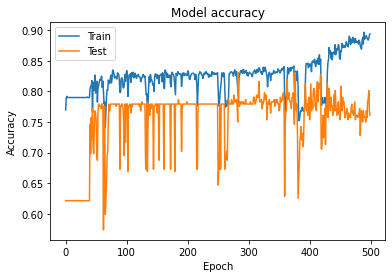

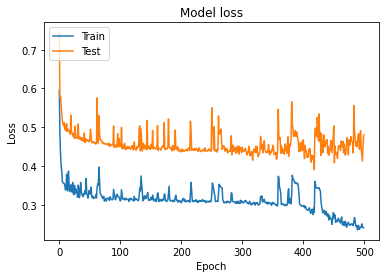

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
y_pred = newmodel.predict(X_test)  #using new_model

from collections import Counter
from scipy import stats

dist = Counter(y)
for k in dist:
    dist[k] /= len(X)
print(dist)
acum = 0
bound = {}
for i in range(1):
    acum += dist[i]
    bound[i] = np.percentile(y_pred, acum * 100)
print(bound)

def classify(x):
    if x <= bound[0]:
        return 0
    else:
        return 1

final_pred = np.array(list(map(classify, y_pred)))
print(final_pred)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, final_pred))
print (classification_report(y_test,final_pred))

Counter({1: 0.7226519337016575, 0: 0.2773480662983425})
{0: 0.6516597050329598}
[1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1
 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0
 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1
 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1
 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1
 0 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1
 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1
 1 1 0 1 1 1 0 1]
[[

In [ ]:
y_pred = newmodel.predict()  #using new_model

In [ ]:
pip install waitress

     |████████████████████████████████| 61kB 3.1MB/s 


In [ ]:
from flask import Flask, render_template,request
import numpy as np
app = Flask(__name__)

def index():
    return render_template('home.html')

@app.route('/predict' , methods=['POST'])
def home():
    pid = request.form['a']
    hr = request.form['b']
    o2 = request.form['c']
    tem = request.form['d']
    sbp = request.form['e']
    map = request.form['f']
    dbp = request.form['g']
    resp = request.form['h']
    etco2 = request.form['i']
    glu = request.form['k']
    gen = request.form['l']
    arr = np.array([[pid,hr,o2,tem,sbp,map,dbp,resp,etco2,glue,gen]])
    
    
    return render_template('predict.html', data=0)

if __name__ == "__main__":
    from waitress import serve
    serve(app, host="0.0.0.0", port=8080)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
Exception in thread Thread-22:
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/urllib3/connection.py", line 159, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw)
  File "/usr/local/lib/python3.6/dist-packages/urllib3/util/connection.py", line 80, in create_connection
    raise err
  File "/usr/local/lib/python3.6/dist-packages/urllib3/util/connection.py", line 70, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py", line 600, in urlopen
    chunked=chunked)
  File "/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py", line 354, in _make_request
    conn.request(method, url, **httplib_request_kw)
  File "/usr/lib/python3.6/http/client.py",

In [ ]:
#jupyter me chal raha yeh link he yaha pe pata nay kyun kal dekhta hu 

In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask
app = Flask(__name__)
run_with_ngrok(app)   #starts ngrok when the app is run
@app.route("/")
def home():
    return "<h1>Running Flask on Google Colab!</h1>"
  
if __name__ == "__main__":
    from waitress import serve
    serve(app, host="0.0.0.0", port=8080)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://08249f5b7318.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [28/Nov/2020 17:49:30] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/Nov/2020 17:49:30] "GET /favicon.ico HTTP/1.1" 404 -
